# Dependencies and const

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load tests data

In [3]:
test_name = "Test0"

In [14]:
functions_numbers = list(range(1,3+1))

In [17]:
versions_names = ["classic", "marriage-max", "marriage-min", "marriage-mean"]

# Preprocessing functions

In [190]:
def load_covergence_data(tests_names, function_number, version_name):
    histories = []
    for test_name in tests_names:
        file = "../{0}_benchmark_f{1}_{2}_histories.npy".format(
                            test_name, function_number, version_name)
        #print(file)
        histories += np.load(file).tolist()
    means = histories_to_means(histories)
    return means

In [156]:
def load_mean_scores_data(tests_names):
    pass

In [113]:
def histories_to_means(histories):
    dataframes = []
    for hist_id, history in enumerate(histories):
        history_T = np.array(history).T
        dataframes.append(pd.DataFrame(columns = [hist_id], 
                     index=history_T[0],
                     data=history_T[1]))
    df = pd.concat(dataframes, axis=1)
    #Uzupelnienie NaN z poprzednia wartoscia:
    df.fillna(method='ffill',inplace=True)
    #Policzenie srednich:
    df = df.mean(axis=1)
    return df

In [188]:
def print_covergence_graphs(tests_names, y_scale = 'log'):
    for function_number in functions_numbers:
        plt.figure()
        ax = plt.axes()
        ax.ticklabel_format(style='plain')
        ax.set_yscale(y_scale)
        plt.title("Testy dla F{0}".format(function_number))
        for version_name in versions_names:
            covergence_graph = load_covergence_data(tests_names, function_number, version_name)
            covergence_graph.plot()
            #index = covergence_graph.index
            #vals = covergence_graph.values.T[0]
            #plt.plot(index, vals)
        plt.legend(versions_names)

In [ ]:
def print_comp_tables():
    pass

# Simple example

In [50]:
# Names examples for test_name=Test0:
#../Test0_benchmark_f1_classic_histories.npy
#../Test0_benchmark_f1_classic_scores.npy

In [51]:
scores = np.load("../Test0_benchmark_f1_classic_scores.npy")
print(scores.tolist(), scores.mean())

[0.006382288797354779, 0.006339852875532959, 0.00654278161956745] 0.006421641097485063


../Test0_benchmark_f2_classic_histories.npy


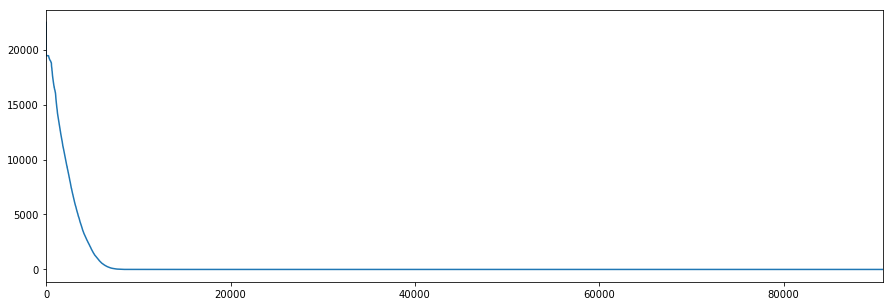

In [174]:
means = load_covergence_data(["Test0"],2,"classic")

plt.figure(figsize=(15,5))
means.plot() #lub nie meansy tylko .T i boxplotowac

# Results

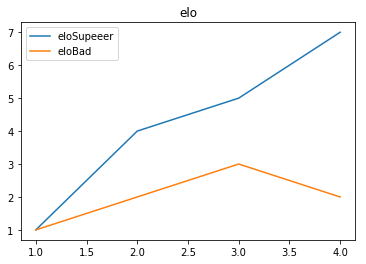

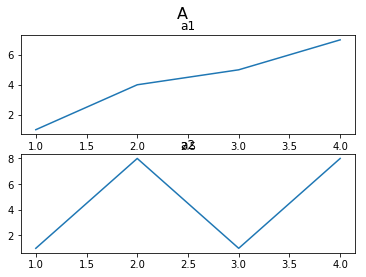

In [138]:
plt.figure()
plt.title("elo")
plt.plot([1,2,3,4],[1,4,5,7])
plt.plot([1,3,4],[1,3,2])
plt.legend(["eloSupeeer","eloBad"])
plt.figure()
plt.suptitle('A', fontsize=16)
plt.subplot(211)
plt.title("a1")
plt.plot([1,2,3,4],[1,4,5,7])
plt.subplot(212)
plt.title("a2")
plt.plot([1,2,3,4],[1,8,1,8])

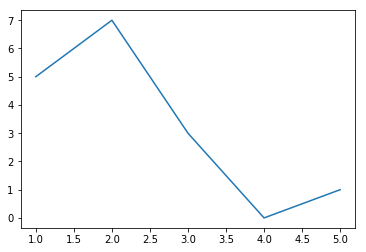

In [184]:
a = pd.DataFrame(index=[1,2,3,4,5], data=[5,7,3,0,1])
a.index
a.values.T[0]
plt.plot(a.index, a.values.T[0])

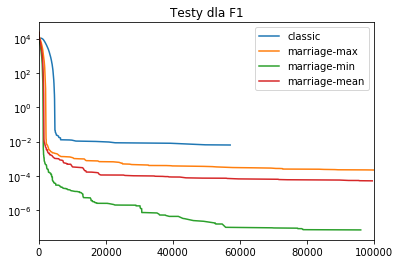

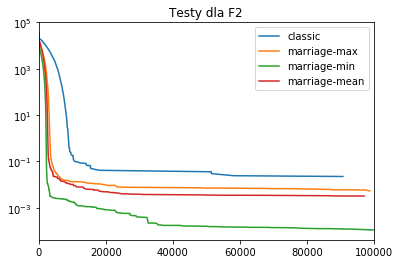

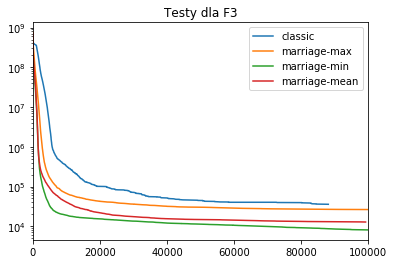

In [191]:
print_covergence_graphs(["Test0"])